In [1]:
from typing import TypedDict
class PortfolioState(TypedDict):
    amount_usd: float
    total_usd: float
    total_ruble: float

In [2]:
def calc_total(state: PortfolioState) -> PortfolioState:
    state['total_usd'] = state['amount_usd'] * 1.08
    return state

def convert_to_ruble(state: PortfolioState) -> PortfolioState:
    state['total_ruble'] = state['total_usd']* 78.5
    return state

In [3]:
from langgraph.graph import StateGraph, START, END

builder = StateGraph(PortfolioState)

builder.add_node("calc_total_node", calc_total)
builder.add_node("convert_to_ruble_node", convert_to_ruble)

builder.add_edge(START, "calc_total_node")
builder.add_edge("calc_total_node", "convert_to_ruble_node")
builder.add_edge("convert_to_ruble_node", END)

graph = builder.compile()

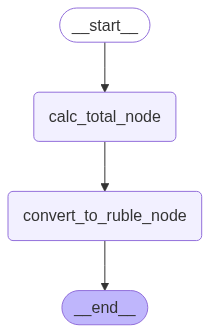

In [4]:
from IPython.display import display, Image

display(Image(graph.get_graph().draw_mermaid_png()))

In [5]:
graph.invoke({"amount_usd": 1000.0})  # Example input

{'amount_usd': 1000.0, 'total_usd': 1080.0, 'total_ruble': 84780.0}